In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate

def get_Dmetric(df, metric_pct):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    return f(metric_pct)

def get_HI(df):   # for D50% pass 50
    indexes = np.array(df.index)   # get test data index and values
    values = np.array(df.values)
    f = interpolate.interp1d(values, indexes)  # create the interp object
    HI = (f(2.0) - f(98.0))/f(50.0)
    return HI

In [2]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is AE83-8D62

 Directory of C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\Project\Lung comparison\Case16

07/02/2017  11:23    <DIR>          .
07/02/2017  11:23    <DIR>          ..
07/02/2017  11:23    <DIR>          .ipynb_checkpoints
07/02/2017  11:23    <DIR>          __pycache__
07/02/2017  11:22                72 Case16 7-2-2017.ipynb
07/02/2017  11:20         1,928,775 Case16_AAA.txt
07/02/2017  11:22         1,971,238 Case16_AXB.txt
25/11/2016  09:23             3,006 pyEclipseDVH.py
               4 File(s)      3,903,091 bytes
               4 Dir(s)  365,332,373,504 bytes free


In [3]:
AAA = eclipse_DVH('Case16_AAA.txt')
AXB = eclipse_DVH('Case16_AXB.txt')

Case16_AAA.txt loaded 	 patID = Case16_AAA	 Prescription [Gy] = 55.000
Case16_AXB.txt loaded 	 patID = Case16_AXB	 Prescription [Gy] = 55.000


In [4]:
AXB.DVH_df.columns

Index(['BODY', 'Foramen+3mm', 'L Brachial plex', 'Oesophagus', 'Heart',
       'Trachea', 'Airway avoidance', 'PTV CHEST', 'Lt_Lung', 'Foramen',
       'PTV ring 2-3cm', 'Rt_Lung', 'Bronchial tree', 'Both Lungs-ITV', 'skin',
       'PseudoPTV-ITV', 'ITV', 'ribs', 'R Brachial plex', 'Dose 50[%]',
       'Dose 100[%]'],
      dtype='object')

(50, 80)

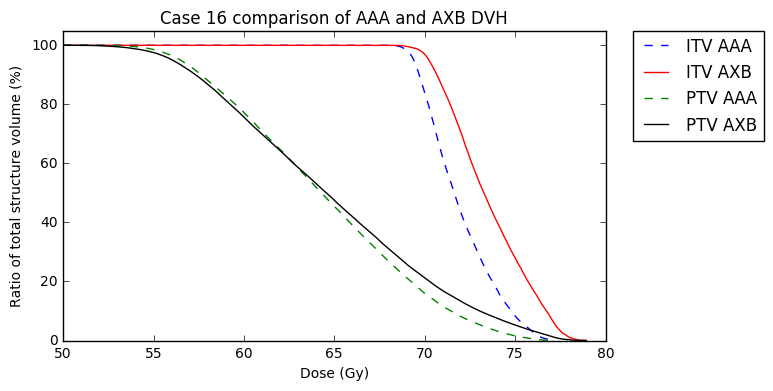

In [5]:
width=7
height=4
plt.figure(figsize=(width, height))

structure = 'ITV'
plt.plot(AAA.DVH_df[structure], label="ITV AAA", color='b', ls='--')
plt.plot(AXB.DVH_df[structure], label="ITV AXB",  color='r' )

structure = 'PTV CHEST'
plt.plot(AAA.DVH_df[structure], label="PTV AAA", color='g', ls='--')
plt.plot(AXB.DVH_df[structure], label="PTV AXB",  color='k' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Case 16 comparison of AAA and AXB DVH')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')
plt.ylim([0,105])
plt.xlim([50,80])

In [6]:
Comparison_df = pd.concat([  #AAA.metrics_df['PTV CHEST_P28'], 
                          # AXB.metrics_df['PTV CHEST_P28'], 
                           
                           AAA.metrics_df['ITV'], 
                           AXB.metrics_df['ITV']], 
                           axis=1)
Comparison_df

,ITV,ITV
Metric,,
Structure,ITV,ITV
Approval Status,Unapproved,Unapproved
Plan,Case16,Case16_AXB_Dm
Course,1,1
Volume [cmÂ³],1.7,1.7
Dose Cover.[%],100.0,100.0
Sampling Cover.[%],99.8,100.0
Min Dose [%],123.0,123.3
Max Dose [%],140.5,143.7
